In [1]:
!where self_nucleation.csv

C:\Users\20224751\Downloads\self_nucleation.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'C:\Users\20224751\Downloads\self_nucleation.csv'

df = pd.read_csv(file_path)

print(df.to_string()) 

    time       DH
0       1  0.3560
1       2  0.7890
2       3  0.9849
3       4  1.1000
4       5  1.3920
5       6  1.4020
6       7  1.4500
7       8  1.5500
8       9  1.7800
9      10  1.9000
10     20  2.0100
11     30  2.1100
12     40  2.1100
13     50  2.1100
14     60  2.1100
15     70  2.1100
16     80  2.1100
17     90  2.1100
18    100  2.1100


col.strip() is used to remove leading and trailing whitespaces from each element (or string) in a column (or Series) named col

In [3]:
# Data frame and strip wiht spaces from csv file
df = pd.DataFrame(df)
df.columns = [col.strip() for col in df.columns]
print(df.columns)
print(df)

Index(['time', 'DH'], dtype='object')
    time      DH
0      1  0.3560
1      2  0.7890
2      3  0.9849
3      4  1.1000
4      5  1.3920
5      6  1.4020
6      7  1.4500
7      8  1.5500
8      9  1.7800
9     10  1.9000
10    20  2.0100
11    30  2.1100
12    40  2.1100
13    50  2.1100
14    60  2.1100
15    70  2.1100
16    80  2.1100
17    90  2.1100
18   100  2.1100


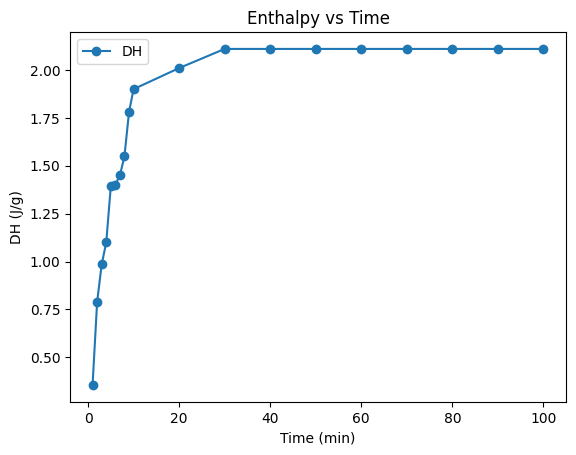

In [4]:
# Plot 
df.plot(x='time', y='DH', marker='o', linestyle='-')
plt.xlabel('Time (min)')
plt.ylabel('DH (J/g)')
plt.title('Enthalpy vs Time')
plt.show()

Provide an initial guess for the parameters (DHinf, k, tzero, and n). This is necessary for the optimization algorithm to start the process. You might base your initial guess on some knowledge of the system or by visually inspecting the data.
Define the Model Function (DH):you start with a model function, in your case, DH(t, DHinf, k, tzero, n).
Collect Experimental Data: you have experimental data, represented by arrays t_data and a_data (a_data=DH)

\begin{equation}
 DH(t) = DH_\infty (1 - \Exp(- k (t-t_0)^n)
\end{equation}

DH[t_] := DHinf*(1 - Exp[-(k (t - tzero))^n])
4 initial guesses (DHinf, k, t zero, n)

In [5]:
t_data = np.array(df['time'])
a_data = np.array(df['DH'])

# Define the DH function
def delta_enthalpy(t, DHinf, k, tzero, n):
    return DHinf * (1 - np.exp(-k * np.abs(t - tzero)**n))

DH = delta_enthalpy

We need to provide an initial guess for the parameters (DHinf, k, tzero, and n). This is necessary for the curve fitting algorithm to start the optimization process. You might base your initial guess on some knowledge of the system or by visually inspecting the data:


In [6]:
initial_guess = (0.1, 0.8, 0.3, 1)

The curve_fit function adjusts the parameters of your model function to best fit the experimental data. It minimizes the difference between the observed data and the values predicted by the model.

In [7]:
# Fit the function to the data
from scipy.optimize import curve_fit

#scipy.optimize.curve_fit(f, xdata, ydata, p0=None)
params, covariance = curve_fit(DH, t_data, a_data, p0=initial_guess)

# Fitted parameters estraction 
DHinf_fit, k_fit, tzero_fit, n_fit = params

# Print the fitted parameters
print("Fitted DHinf:", DHinf_fit)
print("Fitted k:", k_fit)
print("Fitted tzero:", tzero_fit)
print("Fitted n:", n_fit)

Fitted DHinf: 2.129861830183333
Fitted k: 0.4436893196997899
Fitted tzero: 1.2090679092188883
Fitted n: 0.6176213095096593


In [8]:
print(covariance)

[[ 9.31645911e-04 -7.00369976e-05 -2.51780896e-04 -5.85728786e-04]
 [-7.00369976e-05  8.94242531e-04  1.95915180e-05 -1.00225694e-03]
 [-2.51780896e-04  1.95915180e-05  5.65954337e-03  6.62131629e-04]
 [-5.85728786e-04 -1.00225694e-03  6.62131629e-04  2.06402940e-03]]


Elements in the diagonal represent the covariance for each parameter. Off-diagonal you have the interactions between parameters (example k and t_zero).

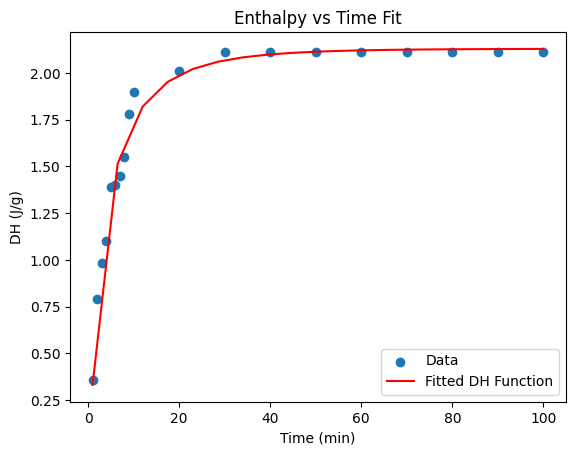

In [9]:
import matplotlib.pyplot as plt
def fitted_DH(t_data):
    return DH(t_data, DHinf_fit, k_fit, tzero_fit, n_fit)

# Plot the original data and the fitted function
plt.scatter(t_data, a_data, label='Data')
t_values = np.linspace(min(t_data), max(t_data), 19)
plt.plot(t_values, fitted_DH(t_values), label='Fitted DH Function', color='red')
plt.xlabel('Time (min)')
plt.ylabel('DH (J/g)')
plt.title('Enthalpy vs Time Fit')
plt.legend()
plt.show()

Linear model => slope calculation => kinetic
Log1minXovXmax = {t - tzero1 /. DH.fit, 
   Log[1 - DH/DHinf1 /. DH_fit]} MATHEMATICA CODE 

In [10]:
t_data, a_data

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  20,  30,  40,
         50,  60,  70,  80,  90, 100], dtype=int64),
 array([0.356 , 0.789 , 0.9849, 1.1   , 1.392 , 1.402 , 1.45  , 1.55  ,
        1.78  , 1.9   , 2.01  , 2.11  , 2.11  , 2.11  , 2.11  , 2.11  ,
        2.11  , 2.11  , 2.11  ]))

0.2090679092188883 -0.18289811433433004
0.7909320907811117 -0.4627445450794324
1.7909320907811117 -0.620685808792637
2.7909320907811117 -0.7266324613685916
3.7909320907811117 -1.0600558030424445
4.790932090781112 -1.0737011516615231
5.790932090781112 -1.141922801523672
6.790932090781112 -1.3010225368020685
7.790932090781112 -1.8062740825047423
8.790932090781112 -2.2263339980666013
18.790932090781112 -2.877472723885417
28.790932090781112 -4.6750125795234165
38.79093209078111 -4.6750125795234165
48.79093209078111 -4.6750125795234165
58.79093209078111 -4.6750125795234165
68.79093209078111 -4.6750125795234165
78.79093209078111 -4.6750125795234165
88.79093209078111 -4.6750125795234165
98.79093209078111 -4.6750125795234165


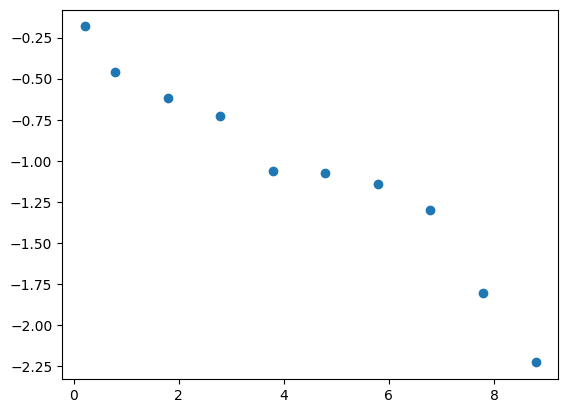

In [14]:
new_a_data =  np.log(1 - a_data / DHinf_fit)
new_t_data =  ( np.abs(t_data - tzero_fit))

for x,y in zip(new_t_data, new_a_data):
    print(x,y)
plt.scatter(new_t_data[:10],new_a_data[:10])

In [31]:
# Fit the function to the data
from scipy.optimize import curve_fit

initial guess = 
#scipy.optimize.curve_fit(f, xdata, ydata, p0=None)
params_new, covariance_new = curve_fit(new_t_data, new_a_data, p0=initial_guess)

# Fitted parameters estraction 
DHinf_fit, k_fit, tzero_fit, n_fit = params

# Print the fitted parameters
print("Fitted DHinf:", DHinf_fit)
print("Fitted k:", k_fit)
print("Fitted tzero:", tzero_fit)
print("Fitted n:", n_fit)

Fitted function: np.log(1 - 0.05 * (new_t_data**0.8))


In [ ]:
plt.scatter(new_t_data[:10], new_a_data[:10], label='Data')
plt.plot(x, y_fit, label='Linear Regression', color='red')

In [15]:
# Transform the data with the log (np.log is a ntural log)
# def LogDH(t_data, DHinf_fit, k_fit, tzero_fit, n_fit):
#     return -k_fit((t_data - tzero_fit)**n_fit)*(np.log(1 - a_data/DHinf_fit)

def LogDH(t, DHinf, k, tzero, n):
    return np.log(DHinf * (1 - np.exp(-k * np.abs(t - tzero)**n)))

# LogDH(10)
LogDH(t_data, DHinf_fit, k_fit, tzero_fit, n_fit)

array([-1.10640478, -0.38722825,  0.00218083,  0.18814392,  0.30342706,
        0.38341202,  0.44259227,  0.48825634,  0.52455366,  0.5540535 ,
        0.68761498,  0.72645427,  0.74167935,  0.74855189,  0.75193487,
        0.75370376,  0.7546716 ,  0.75522046,  0.75554095])

plt.scatter(x[:10], y[:10], label='Data') for taking the first part of the curve that does not include the plateau (it would lead to a constant line - try yourself by deleting [:10])
The function LogDH takes as input parameters related to time (t_data) and fitted parameters (DHinf_fit, k_fit, tzero_fit, n_fit). It calculates two arrays, x and y, and returns them.
t_data: Input data related to time.
DHinf_fit, k_fit, tzero_fit, n_fit: Fitted parameters used in the calculations.
Inside the function:

x = (t_data - tzero_fit): Calculates the array x by subtracting tzero_fit from each element of t_data.

y = np.log(1 - a_data / DHinf_fit): Calculates the array y by performing element-wise operations on a_data and DHinf_fit, then taking the natural logarithm (np.log).

return x, y: Returns the arrays x and y as a tuple.

Log(1-DH/DHmax) = Log(1-a_data/DHinf_fit) 


In [13]:
import matplotlib.pyplot as plt

# def LogDH(t_data, DHinf_fit, k_fit, tzero_fit, n_fit):
#     x = (t_data - tzero_fit)
#     y = np.log(1 - a_data / DHinf_fit)
#     return x, y


In [11]:
print(x)

[-0.20906791  0.79093209  1.79093209  2.79093209  3.79093209  4.79093209
  5.79093209  6.79093209  7.79093209  8.79093209 18.79093209 28.79093209
 38.79093209 48.79093209 58.79093209 68.79093209 78.79093209 88.79093209
 98.79093209]


np.polyfit: This function is used for polynomial fitting. It calculates the coefficients of a polynomial that best fits a set of data points in a least-squares sense.
np.poly1d: This function is used to create a polynomial object from a given set of coefficients. 

In [12]:
print(y)

[-0.18289811 -0.46274455 -0.62068581 -0.72663246 -1.0600558  -1.07370115
 -1.1419228  -1.30102254 -1.80627408 -2.226334   -2.87747272 -4.67501258
 -4.67501258 -4.67501258 -4.67501258 -4.67501258 -4.67501258 -4.67501258
 -4.67501258]


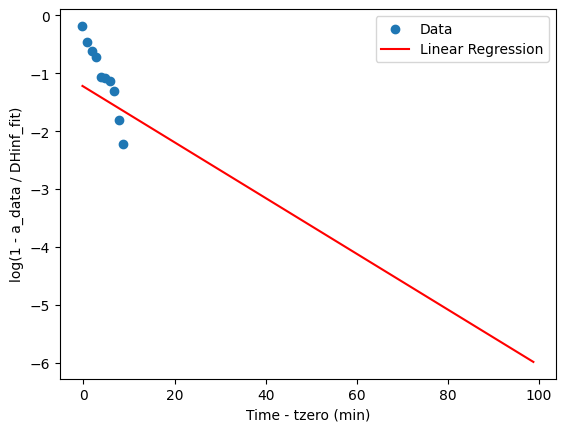

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = x.reshape(-1, 1)

# Linear regression
regressor = LinearRegression()
regressor.fit(x, y)
y_fit = regressor.predict(x)

plt.scatter(x[:10], y[:10], label='Data')
plt.plot(x, y_fit, label='Linear Regression', color='red')
plt.xlabel('Time - tzero (min)')
plt.ylabel('log(1 - a_data / DHinf_fit)')
plt.legend()
plt.show()

In [15]:
slope = regressor.coef_[0]
intercept = regressor.intercept_

print(f"Slope: {slope}, Intercept: {intercept}")

Slope: -0.04812174143932022, Intercept: -1.2290986905128143


In [16]:
print(y_fit)

[-1.21903798 -1.26715972 -1.31528146 -1.3634032  -1.41152494 -1.45964669
 -1.50776843 -1.55589017 -1.60401191 -1.65213365 -2.13335107 -2.61456848
 -3.09578589 -3.57700331 -4.05822072 -4.53943814 -5.02065555 -5.50187297
 -5.98309038]


In [17]:
# Mean squared error and R2 
from sklearn.metrics import mean_squared_error, r2_score

mea = mean_squared_error(y, y_fit)
r2 = r2_score(y,y_fit)

print(mea)
print(r2)

0.7822255941281547
0.7584489694303048
